## Environment Variables

In [18]:
FASTTEXT_BIN_FILENAME = "../../data/fasttext_wiki.simple/wiki.simple" # No extension
AGENDAS_FILE = "../agendas_2015.json"

## Load FastText word vectors

In [19]:
from gensim.models.fasttext import FastText 
ft_vectors = FastText.load_fasttext_format(FASTTEXT_BIN_FILENAME)

## Compute tag vectors

In [20]:
tag_list = [
  "Community",
  "Learning",
  "Health",
  "Economic opportunity",
  "Responsive government",
  "Environment",
  "Sustainability",
  "Public Safety",
  "Parks and Recreation",
  "Free Speech",
  "Housing",
  "Mobility",
  "Pets",
  "Zoning",
  "Infrastructure",
  "Sanitation",
]

import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize

def normalize_1d(arr):
  return normalize(arr.reshape((-1, 1)), axis=0).reshape(-1)

norm_tag_vectors_df = pd.DataFrame([[normalize_1d(ft_vectors[tag])] for tag in tag_list], index=tag_list)
norm_tag_vectors_df.head()

,0
Community,"[0.107353, 0.014057, 0.0567076, -0.0995658, 0...."
Learning,"[-0.0137298, 0.0188015, 0.0642292, -0.197562, ..."
Health,"[0.0840927, -0.0263651, 0.086565, -0.0426737, ..."
Economic opportunity,"[0.119068, 0.0266694, 0.0435833, -0.0459042, -..."
Responsive government,"[0.0305218, -0.0707071, 0.111598, -0.0647245, ..."


## Plotting and document vector helpers

In [21]:
import matplotlib.pyplot as plt 
import nltk
import re
from sklearn.manifold import TSNE

nltk.download('stopwords')
STOP_WORDS = nltk.corpus.stopwords.words()

def tsne_scatter_plot(vectors, tags, figsize=(20, 10)):
  tsne = TSNE(n_components=2)
  vectors_tsne = tsne.fit_transform(vectors)
  vectors_tsne_x = vectors_tsne[:, 0]
  vectors_tsne_y = vectors_tsne[:, 1]
  
  plt.rcParams["figure.figsize"] = figsize
  plt.scatter(vectors_tsne_x, vectors_tsne_y)
  for i, tag in enumerate(tags):
    plt.annotate(tag, (vectors_tsne_x[i], vectors_tsne_y[i]))
  plt.show()
  
def clean_sentence(ft_vectors, sentence):
  # Returns a list of tokens after lowercasing and removing punctuation + stop words.
  regex = re.compile('([^\s\w]|_)+')
  sentence = regex.sub('', sentence).lower().split()
  return [word for word in sentence if (word not in STOP_WORDS and word in ft_vectors.wv.vocab)]

def doc_vector_simple(word_vectors):
  return np.mean(word_vectors, axis=0)

# def doc_vector_sif(word_vectors):
#   return np.mean(word_vectors, axis=0)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eliselkin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##  Plot normalized tag vectors

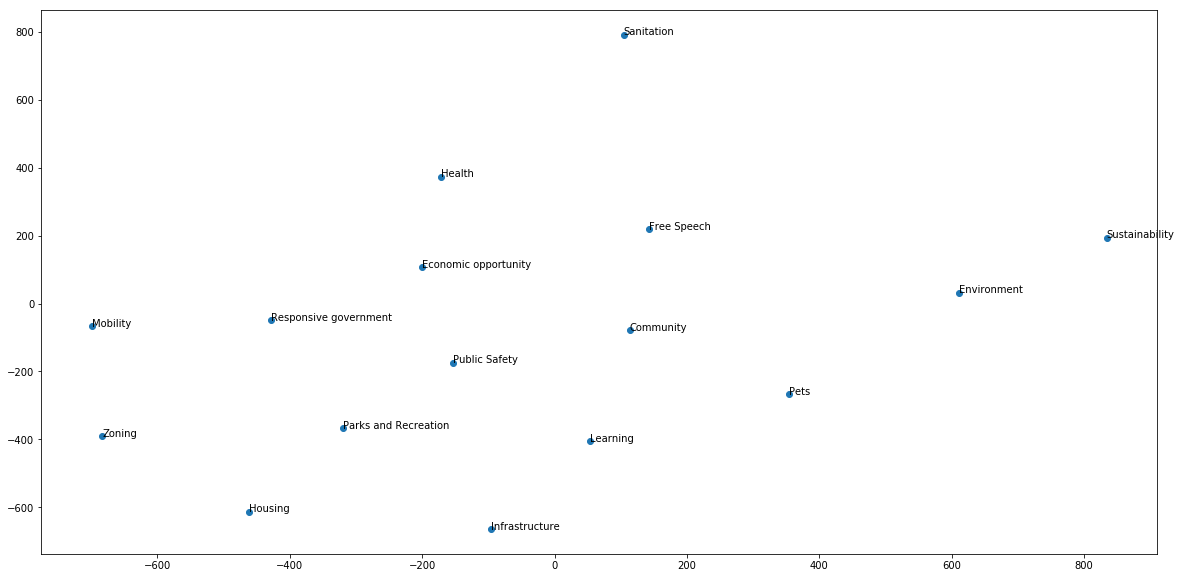

In [22]:
tsne_scatter_plot(norm_tag_vectors_df[0].tolist(), tag_list)

## Load agendas

In [23]:
import json

agenda_items = []
with open(AGENDAS_FILE) as agendas_file:  
  data = json.load(agendas_file)
  for k in data:
    for item_list in data[k]:
      agenda_items.extend(item_list)

print(len(agenda_items))    

187


## Load agendas into DataFrames

In [13]:
agenda_dfs = pd.DataFrame(index=[item["Title"] for item in agenda_items], columns=['title_doc_vector'])
for i, title in enumerate(agenda_dfs.index):
  title_word_vectors = [normalize_1d(ft_vectors[word]) for word in clean_sentence(ft_vectors, title)]
  agenda_dfs.iloc[i] = [doc_vector_simple(title_word_vectors)]

for tag in tag_list:
  agenda_dfs["title_rv_" + tag] = (agenda_dfs["title_doc_vector"] * norm_tag_vectors_df.loc[tag][0]).apply(lambda x: x.sum())
  
agenda_dfs.head()  

,title_doc_vector,title_rv_Community,title_rv_Learning,title_rv_Health,title_rv_Economic opportunity,title_rv_Responsive government,title_rv_Environment,title_rv_Sustainability,title_rv_Public Safety,title_rv_Parks and Recreation,title_rv_Free Speech,title_rv_Housing,title_rv_Mobility,title_rv_Pets,title_rv_Zoning,title_rv_Infrastructure,title_rv_Sanitation
Los Angeles Area Fire Chiefs Association (LAAFCA) Recognition of Chief Walker for Completion of His Term as LAAFCA President,"[0.0395688, -0.0334231, 0.0247196, -0.0293637,...",0.167659,0.216679,0.197247,0.241002,0.292432,0.174305,0.227340,0.246609,0.250744,0.167945,0.221039,0.198629,0.110777,0.198361,0.219596,0.216478
"Proclamation: Declaring January 24-26, 2017 as National Homeless Count Week","[0.00927016, -0.0184384, 0.0180865, -0.0263563...",0.205276,0.243779,0.234482,0.277366,0.280866,0.184101,0.226188,0.314938,0.272844,0.212612,0.248300,0.215668,0.119373,0.200332,0.207860,0.235508
Recognized Obligation Payment Schedule: July 2017 through June 2018 and Administrative Budgets,"[0.01093, 0.00938435, 0.043259, -0.0202644, 0....",0.185780,0.227619,0.252351,0.286025,0.337935,0.185184,0.209085,0.290671,0.273137,0.187698,0.234451,0.209016,0.141205,0.197777,0.222898,0.226285
Appointment of Interim City Attorney and Approval of Employment Agreement and Side Letter Modifying the Public Attorney's Union Memorandum of Understanding,"[0.0491823, -0.0320952, 0.0567026, -0.0648339,...",0.211924,0.239568,0.265409,0.302557,0.352897,0.208717,0.279036,0.315499,0.275900,0.236417,0.273278,0.251868,0.132390,0.194973,0.250904,0.250441
Award of Agreements for Surveying Services and Environmental Consulting Services at the City Yards,"[0.0560631, -0.00255214, 0.00348418, -0.052960...",0.198390,0.260941,0.311113,0.319623,0.343161,0.291281,0.336994,0.308331,0.281048,0.208448,0.305197,0.275036,0.214061,0.189655,0.332835,0.297454


## Plot title document vectors

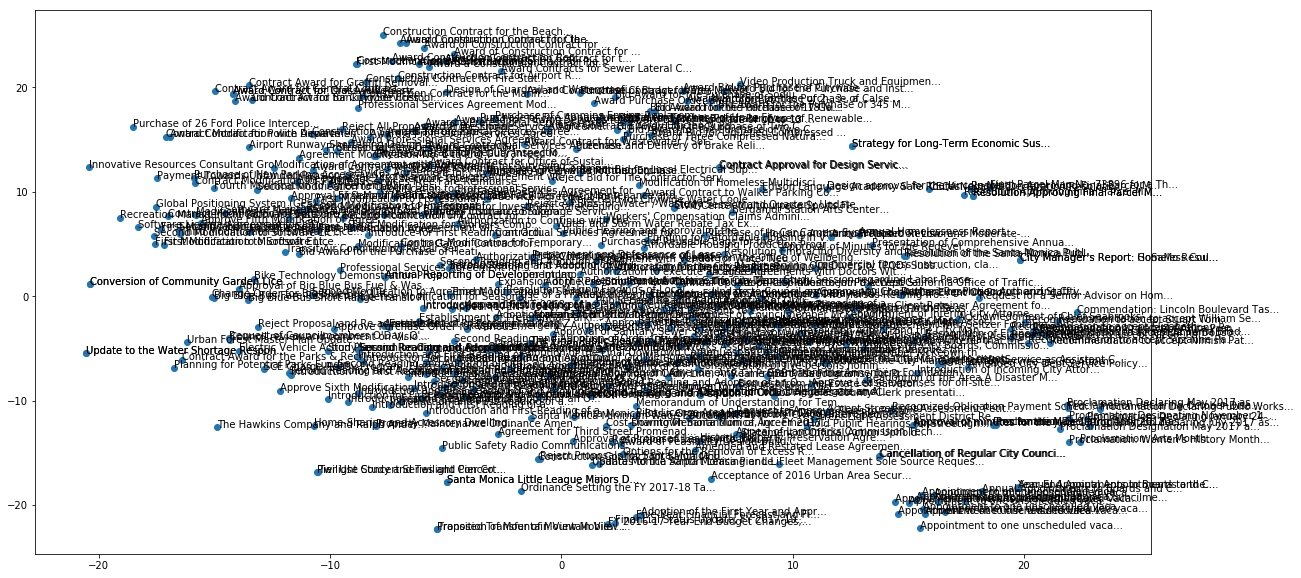

In [14]:
tsne_scatter_plot(agenda_dfs["title_doc_vector"].tolist(), [title[:35] + "..." for title in agenda_dfs.index])

## Plot projections on tag vectors

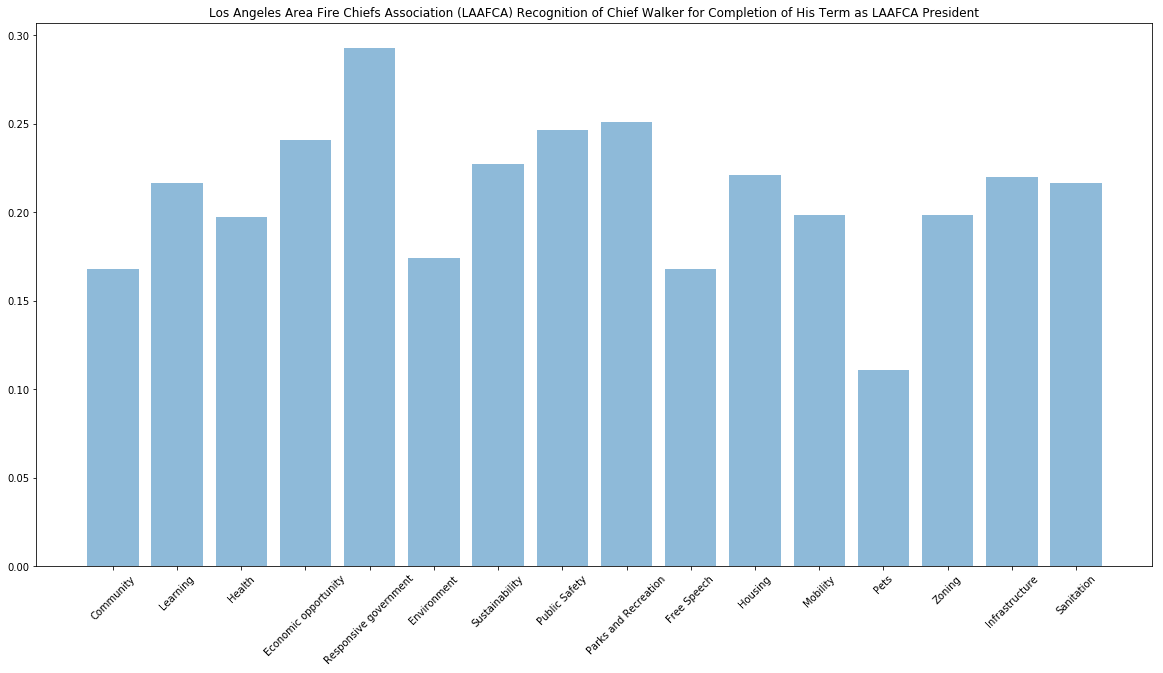

In [15]:
def plot_relevancy_vector(vector, title):
  y_pos = np.arange(len(tag_list))
  plt.bar(y_pos, vector, align='center', alpha=0.5)
  plt.xticks(y_pos, tag_list, rotation=45)
  plt.title(title)
  plt.show()
  
plot_relevancy_vector(agenda_dfs.iloc[0,1:], agenda_dfs.index[0])

## List most relevant documents for each tag

In [16]:
agenda_dfs.sort_values(by="title_rv_Sanitation", ascending=False).head(10)

,title_doc_vector,title_rv_Community,title_rv_Learning,title_rv_Health,title_rv_Economic opportunity,title_rv_Responsive government,title_rv_Environment,title_rv_Sustainability,title_rv_Public Safety,title_rv_Parks and Recreation,title_rv_Free Speech,title_rv_Housing,title_rv_Mobility,title_rv_Pets,title_rv_Zoning,title_rv_Infrastructure,title_rv_Sanitation
BBB Facilities HVAC Maintenance and Repair,"[0.0564984, 0.00438787, 0.0439135, -0.111352, ...",0.193055,0.228381,0.241728,0.275850,0.323911,0.256763,0.279660,0.291369,0.336612,0.150892,0.321490,0.301808,0.241490,0.224957,0.384421,0.365429
Annual Homelessness Report,"[0.0458145, -0.00183232, 0.0752153, -0.069753,...",0.201121,0.258407,0.290611,0.338605,0.351517,0.274247,0.387860,0.303442,0.300328,0.272392,0.259826,0.276204,0.138633,0.199002,0.270076,0.356843
Strategy for Long-Term Economic Sustainability,"[0.111692, -0.0324, 0.0788471, -0.114354, -0.0...",0.241412,0.285229,0.410534,0.485848,0.400573,0.427577,0.589508,0.264233,0.329074,0.265692,0.322466,0.392191,0.147938,0.221008,0.422211,0.352466
Strategy for Long-Term Economic Sustainability,"[0.111692, -0.0324, 0.0788471, -0.114354, -0.0...",0.241412,0.285229,0.410534,0.485848,0.400573,0.427577,0.589508,0.264233,0.329074,0.265692,0.322466,0.392191,0.147938,0.221008,0.422211,0.352466
Clinical Services Contract to Support Affordable Housing,"[0.0789756, 0.0181596, 0.0165151, -0.0663241, ...",0.204480,0.247700,0.312629,0.346983,0.359753,0.268686,0.359515,0.292206,0.298887,0.205491,0.398873,0.333219,0.212004,0.183766,0.362858,0.351664
Modification of Software Maintenance and Support for Hansen Computerized Maintenance Management System,"[0.0625226, -0.0332542, 0.0296999, -0.0932887,...",0.193068,0.220518,0.258155,0.286744,0.320556,0.308897,0.343571,0.288855,0.321908,0.194655,0.268000,0.305774,0.184949,0.229408,0.357629,0.349483
Software Maintenance and Support Services Contract Modification for the Housing Authority,"[0.0767866, -0.0123648, 0.0199017, -0.0697993,...",0.193819,0.234512,0.281402,0.303986,0.360037,0.269234,0.329911,0.302661,0.314835,0.203593,0.354906,0.329020,0.201684,0.199254,0.374626,0.349342
Proclamation Declaring May 2017 as Mental Health Awareness Month,"[0.0204949, -0.0175651, 0.0218062, -0.0247835,...",0.206220,0.292818,0.355631,0.302754,0.327524,0.255751,0.330138,0.347507,0.290626,0.262785,0.274443,0.303366,0.166277,0.263432,0.235941,0.346671
"Fourth Modification to Agreement 9210 (CCS) for Parking Citation Processing, Parking Permit Fulfillment, and Payment Processing Services","[0.0524987, 0.00976807, 0.0367558, -0.0542348,...",0.156154,0.260406,0.262875,0.288091,0.314888,0.235479,0.300392,0.306947,0.306229,0.224524,0.293290,0.297382,0.207477,0.226655,0.303155,0.344417
Modification to Gafcon Contract for Citywide Prevailing Wage and Labor Compliance,"[0.0264151, -0.0236588, 0.0261058, -0.0472088,...",0.172975,0.247335,0.248096,0.335096,0.352104,0.271660,0.317603,0.300216,0.300633,0.211978,0.296188,0.314854,0.171540,0.235513,0.310764,0.339922


## Plot per-tag variance

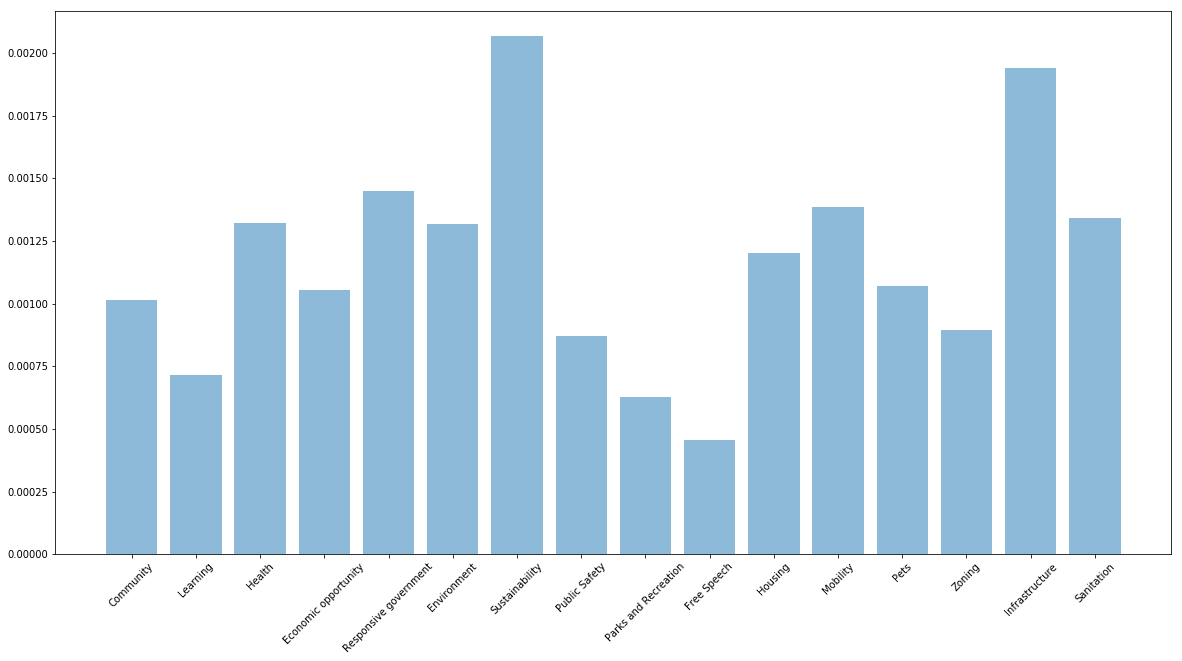

In [17]:
def plot_avg_variance(vector):
  y_pos = np.arange(len(tag_list))
  plt.bar(y_pos, vector, align='center', alpha=0.5)
  plt.xticks(y_pos, tag_list, rotation=45)
  plt.show()
  
plot_avg_variance(agenda_dfs.iloc[:, 1:].var())